# Titanic Survival Analysis



## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Reading the data

In [3]:
df = pd.read_csv('Downloads/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
inputs = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1)
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


#### Using LabelEncoder to convert the non number data types to number for model training

In [9]:
le_sex = LabelEncoder()
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs.head()

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [11]:
inputs.drop(['Sex'],axis = 1,inplace=True)
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [13]:
inputs.describe()

,Pclass,Age,Fare,sex_n
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.647587
std,0.836071,14.526497,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,1.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [15]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Fare    891 non-null    float64
 3   sex_n   891 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.5 KB


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   sex_n   891 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.5 KB


In [21]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


## Creating and training the models

#### Creating training and testing sets of data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(712, 4) (712,) (179, 4) (179,)


#### 1. Using a decision tree classifier

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [27]:
model.fit(X_train,y_train)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [29]:
model.score(X_test,y_test)

0.7597765363128491

#### 2. Using logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [33]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
log_model.score(X_test,y_test)

0.7988826815642458

## Plotting the confusion matrix for both models 

In [37]:
from sklearn.metrics import mean_squared_error,confusion_matrix,ConfusionMatrixDisplay

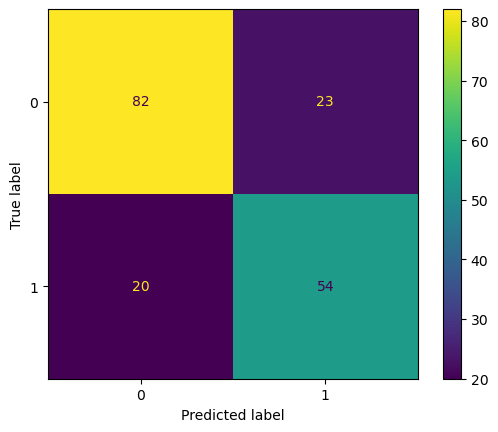

In [39]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#### Confusion matrix for decision tree classifier

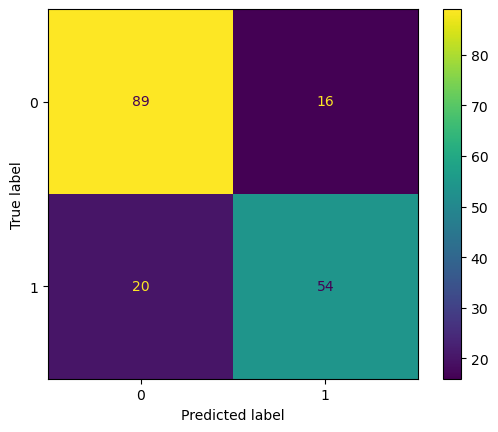

In [41]:
y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#### Confusion matrix for logistic regression classifier

#### We see that a logistic regression model gives a slightly better accuracy on the test data than the decision tree classifier